In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

main_dir = 'C:\\Users\\Georgios\\Downloads\\clustering4ccerRevision\\journal\\new\\'
df = pd.read_csv(main_dir + 'schemaAgnosticAnalysisCleanFinalTimesNodes.csv', sep='|')
df

,Dataset,Nodes,Representation Model,Similarity Metric,Duplicates Type,Valid Pairs,Portion of Valid Pairs,CNC Precision,CNC Recall,CNC F-Measure,...,KRC Recall,KRC F-Measure,KRC Threshold,KRC Run-time,UMC Precision,UMC Recall,UMC F-Measure,UMC Threshold,UMC Run-time,BMC Configuration (it's the opposite in fact)
0,Restaurants,2595,CHARACTER_BIGRAMS,COSINE_SIMILARITY,Scarce,764784,1.000,0.758,0.775,0.767,...,0.989,0.871,0.90,81,0.772,0.989,0.867,0.90,21,Right
1,Restaurants,2595,CHARACTER_BIGRAMS,ENHANCED_JACCARD_SIMILARITY,Scarce,764784,1.000,0.781,0.921,0.845,...,0.933,0.818,0.70,119,0.371,1.000,0.541,0.65,40,Right
2,Restaurants,2595,CHARACTER_BIGRAMS,GENERALIZED_JACCARD_SIMILARITY,Scarce,764784,1.000,0.798,0.933,0.860,...,0.966,0.847,0.80,47,0.787,0.663,0.720,0.90,9,Right
3,Restaurants,2595,CHARACTER_BIGRAMS_TF_IDF,ARCS_SIMILARITY,Scarce,764784,1.000,0.733,0.831,0.779,...,0.899,0.780,0.45,41,0.690,0.899,0.780,0.45,9,Right
4,Restaurants,2595,CHARACTER_BIGRAMS_TF_IDF,COSINE_SIMILARITY,Scarce,764784,1.000,0.730,0.820,0.772,...,0.989,0.568,0.60,32,0.378,0.921,0.536,0.70,8,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,Movies,50797,TOKEN_BIGRAM_GRAPHS,GRAPH_VALUE_SIMILARITY,Balanced,20926,0.000,0.983,0.160,0.275,...,0.221,0.357,0.05,62,0.887,0.226,0.361,0.05,52,Right
437,Movies,50797,TOKEN_TRIGRAMS,COSINE_SIMILARITY,Balanced,1308919,0.002,0.965,0.055,0.104,...,0.222,0.348,0.05,826,0.620,0.236,0.342,0.05,884,Right
438,Movies,50797,TOKEN_TRIGRAMS_TF_IDF,ARCS_SIMILARITY,Balanced,1308919,0.002,0.961,0.230,0.371,...,0.240,0.384,0.05,181,0.952,0.241,0.385,0.05,64,Right
439,Movies,50797,TOKEN_TRIGRAMS_TF_IDF,COSINE_SIMILARITY,Balanced,775767,0.001,0.959,0.129,0.227,...,0.241,0.372,0.05,214,0.665,0.253,0.367,0.05,108,Right


In [2]:
runtimes = pd.DataFrame()

for column in df:
    if (0 < column.find('Run-time')):
        runtimes[column] = df[column] / df['Valid Pairs']

runtimes.columns = ['CNC', 'RSR', 'RCA', 'BAH', 'BMC', 'EXC', 'KRC',  'UMC']

In [3]:
runtimes.describe().round(5)

,CNC,RSR,RCA,BAH,BMC,EXC,KRC,UMC
count,441.00000,441.00000,441.00000,441.00000,441.00000,441.00000,441.00000,441.00000
mean,0.00005,0.00031,0.00555,0.07854,0.00007,0.00006,0.00017,0.00011
std,0.00034,0.00226,0.05513,0.55703,0.00044,0.00026,0.00035,0.00038
min,0.00001,0.00001,0.00001,0.00009,0.00001,0.00001,0.00003,0.00001
25%,0.00001,0.00001,0.00002,0.00042,0.00001,0.00001,0.00005,0.00001
50%,0.00001,0.00001,0.00004,0.00129,0.00001,0.00001,0.00006,0.00001
75%,0.00001,0.00003,0.00011,0.00325,0.00002,0.00002,0.00012,0.00006
max,0.00652,0.02810,0.97324,6.45423,0.00746,0.00373,0.00373,0.00602


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale = 1.4)
sns.set_style("white")

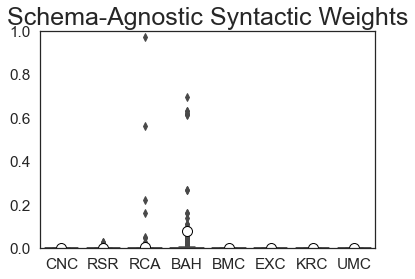

In [5]:
p = sns.boxplot(data = runtimes,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_title("Schema-Agnostic Syntactic Weights", fontsize = 25)
plt.ylim(0, 1)
plt.savefig(main_dir + 'sasyNormRT.eps', format='eps')

In [6]:
runtimes = pd.DataFrame()

for column in df:
    if (0 < column.find('Run-time')):
        runtimes[column] = df[column] / df['Nodes']

runtimes.columns = ['CNC', 'RSR', 'RCA', 'BAH', 'BMC', 'EXC', 'KRC',  'UMC']

In [7]:
runtimes.describe().round(3)

,CNC,RSR,RCA,BAH,BMC,EXC,KRC,UMC
count,441.000,441.000,441.000,441.000,441.000,441.000,441.000,441.000
mean,0.011,0.026,0.074,1.310,0.015,0.053,0.452,0.338
std,0.019,0.099,0.138,1.500,0.043,0.541,2.459,3.762
min,0.000,0.001,0.002,0.202,0.000,0.000,0.000,0.000
25%,0.002,0.004,0.012,0.273,0.002,0.002,0.013,0.003
50%,0.006,0.011,0.026,0.502,0.006,0.008,0.045,0.012
75%,0.011,0.015,0.056,2.265,0.013,0.014,0.096,0.024
max,0.158,1.889,0.610,5.038,0.756,10.850,25.003,75.864


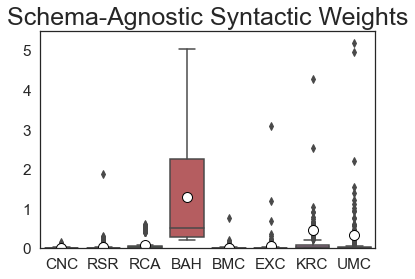

In [8]:
p = sns.boxplot(data = runtimes,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_title("Schema-Agnostic Syntactic Weights", fontsize = 25)
plt.ylim(0, 5.5)
plt.savefig(main_dir + 'sasyNormRT.eps', format='eps')